ARIMA: AutoRegressive Integrated Moving Average

ARIMA(p,d,q)

p: The number of lag observations included in the model

d: The number of times that the raw observations are differenced

q: The size of the moving average window

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
df = pd.read_csv("data/consumption_temp.csv")
df = df.set_index('time')
df.index = pd.to_datetime(df.index)
df.tail()

,location,consumption,temperature
time,,,
2023-04-02 21:00:00,helsingfors,6.333000,-1.1
2023-04-02 21:00:00,oslo,12.134655,-1.1
2023-04-02 21:00:00,stavanger,5.622820,0.5
2023-04-02 21:00:00,tromsø,2.018333,-2.5
2023-04-02 21:00:00,trondheim,3.749047,-3.8


8641 8641 8641 8641 8641 6289
datetime64[ns]


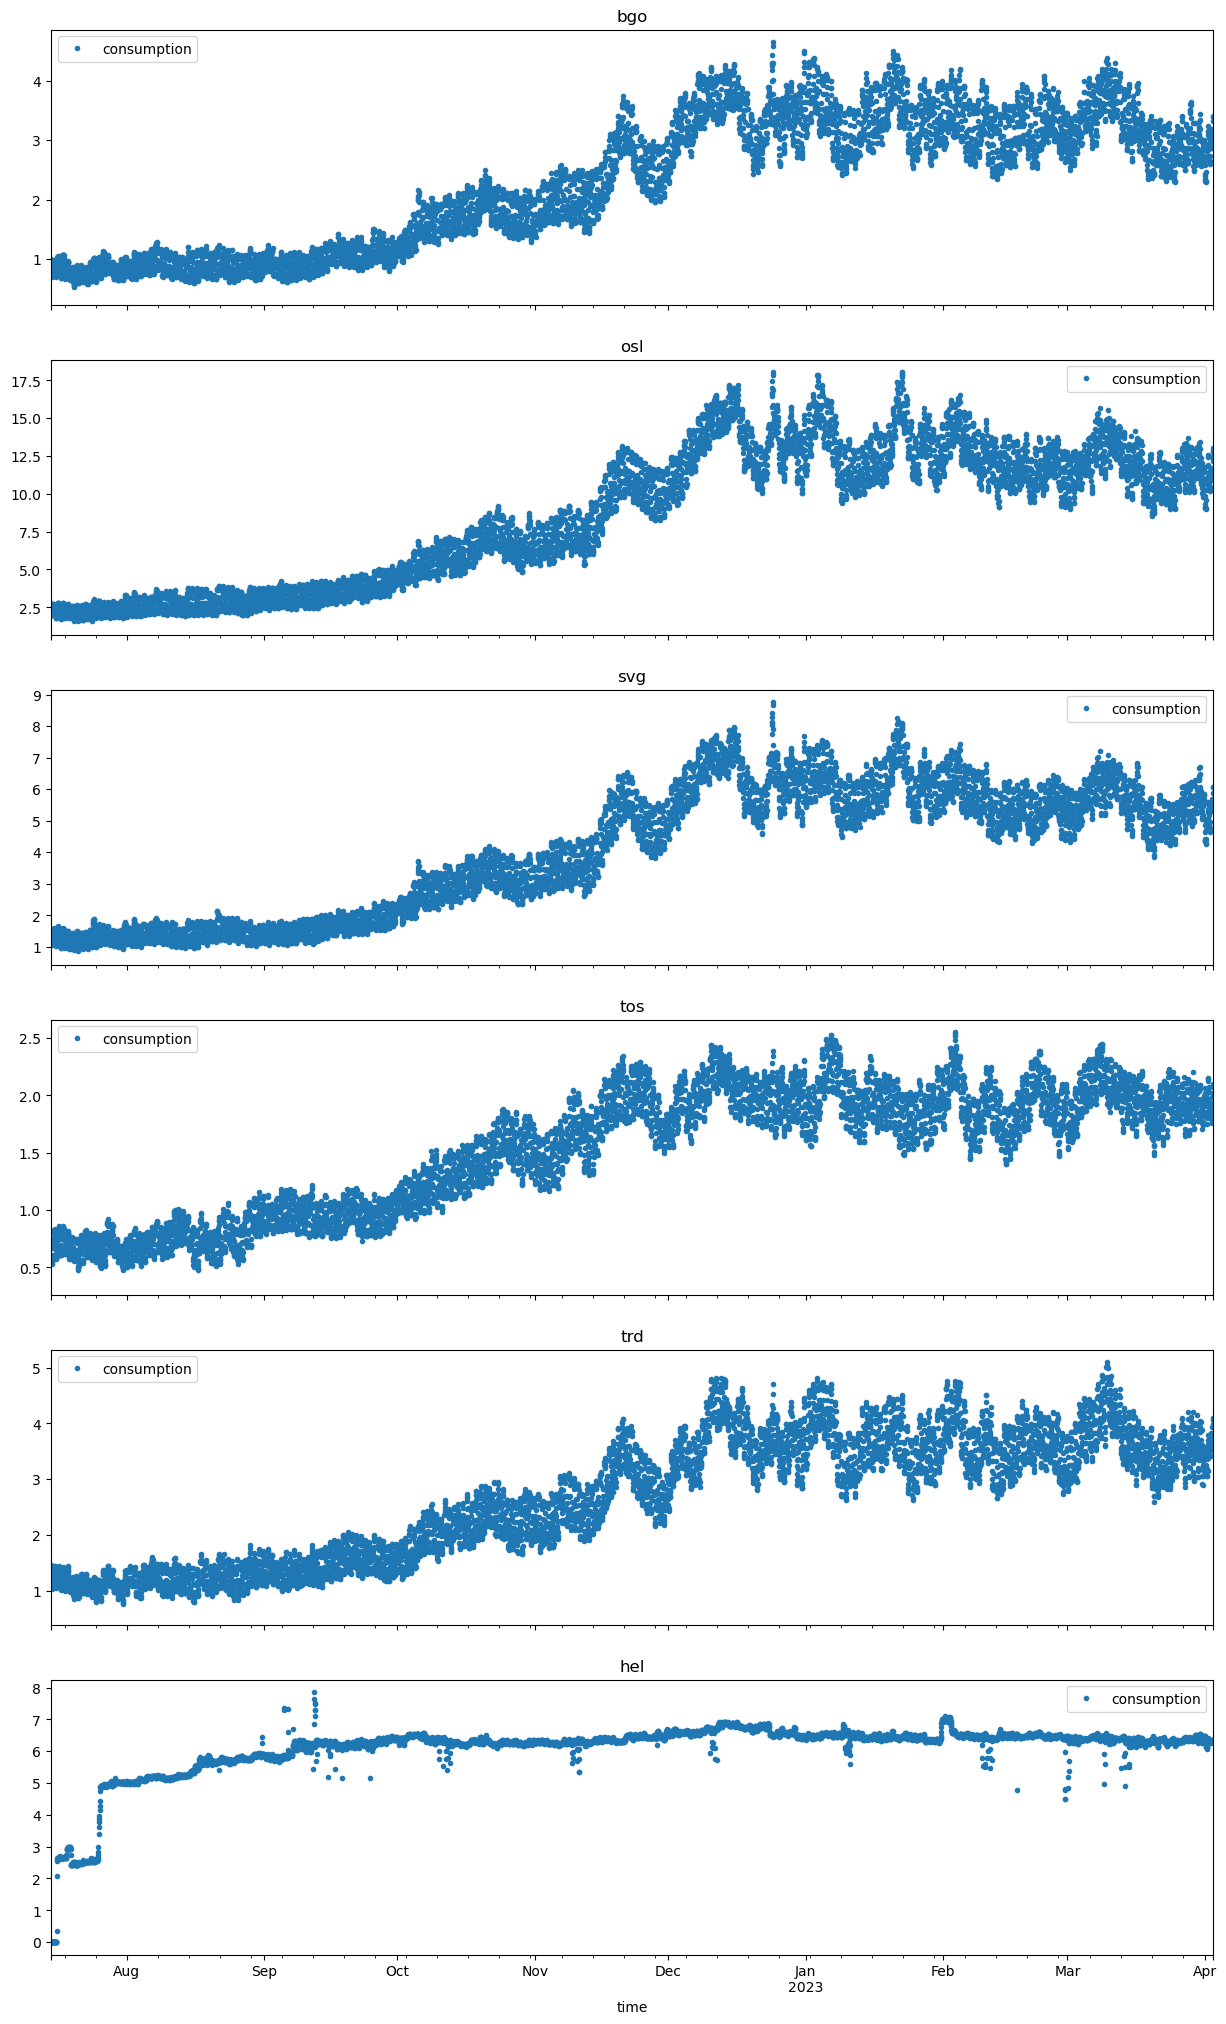

In [9]:
bgo = df.query('location == "bergen"')
osl = df.query('location == "oslo"')
svg = df.query('location == "stavanger"')
tos = df.query('location == "tromsø"')
trd = df.query('location == "trondheim"')
hel = df.query('location == "helsingfors"')

locations = [bgo, osl, svg, tos, trd, hel]

fig, axs = plt.subplots(6, 1, figsize=(15,25), sharex=True)
bgo[["consumption"]].plot(ax=axs[0], title="bgo", style=".")
osl[["consumption"]].plot(ax=axs[1], title="osl", style=".")
svg[["consumption", ]].plot(ax=axs[2], title="svg", style=".")
tos[["consumption", ]].plot(ax=axs[3], title="tos", style=".")
trd[["consumption", ]].plot(ax=axs[4], title="trd", style=".")
hel[["consumption", ]].plot(ax=axs[5], title="hel", style=".")

print(bgo.shape[0], osl.shape[0], svg.shape[0], tos.shape[0], trd.shape[0], hel.shape[0])
print(osl.index.dtype)